In [44]:
from scipy.stats import hypergeom
import numpy as np
# N为牌总数
# K为反面总个数
# 由于9为终态，将其暂时排除。
N = 9
A = list()  # 转移矩阵
for K in range(0, N):
    X = hypergeom(N, K, 3).pmf(range(0, 4))  # 超几何分布
    B = [0]*10  # 转移概率
    for i in range(0, 4):
        if X[i] == 0:
            continue
        B[[K+3, K+1, K-1, K-3][i]] = X[i]
    A.append(B[:9])
A = np.array(A)  # 转移矩阵
E = np.eye(9)  # 单位矩阵

print(A)
B = np.linalg.inv(E-A)
B = np.dot(B, A)
print(B, "\n", B[0, 6]+1)


0
0
0
0
0
0
0.011904761904761908
0
0
[[0.         0.         0.         1.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.66666667 0.
  0.         0.         0.        ]
 [0.         0.08333333 0.         0.5        0.         0.41666667
  0.         0.         0.        ]
 [0.01190476 0.         0.21428571 0.         0.53571429 0.
  0.23809524 0.         0.        ]
 [0.         0.04761905 0.         0.35714286 0.         0.47619048
  0.         0.11904762 0.        ]
 [0.         0.         0.11904762 0.         0.47619048 0.
  0.35714286 0.         0.04761905]
 [0.         0.         0.         0.23809524 0.         0.53571429
  0.         0.21428571 0.        ]
 [0.         0.         0.         0.         0.41666667 0.
  0.5        0.         0.08333333]
 [0.         0.         0.         0.         0.         0.66666667
  0.         0.33333333 0.        ]]
[[  1.02340353   9.1357337   36.60407609  85.96589674 127.79327446

均值 1159.922932330827
方差 604902.5265103021
最大频率 [(63, 49)]


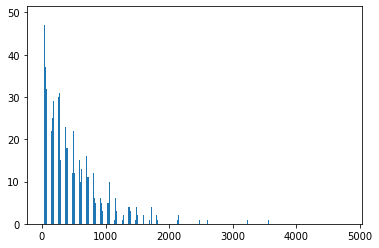

In [118]:
import random
from collections import Counter
import matplotlib.pyplot as plt
import statistics


def f():
    X = [False]*9
    n = 0
    while not all(X):
        for i in random.sample(range(9), 3):
            X[i] = not X[i]
        n += 1
    return n


data = Counter(f() for _ in range(10000))
print("均值", statistics.mean(data))
print("方差", statistics.variance(data))
print("最大频率", data.most_common(1))

plt.bar(data.keys(), data.values())
plt.show()


In [107]:
from scipy.stats import poisson

poisson.pmf(1100, 1778)


1.0507531855153824e-67

In [125]:
import numpy as np
from scipy.optimize import curve_fit  # 曲线拟合

X = np.array(list(data.keys()))
Y = np.array(list(data.values()))

# 多项式拟合
np.polyfit(X, Y, 2)


def reciprocal_func(x, a, b):
    # 定义反比例函数
    return a / x + b


def geom_func(x, p):
    # 定义几何分布函数
    return (1 - p) ** (x - 1) * p


print(curve_fit(reciprocal_func, X, Y))
curve_fit(geom_func, X, Y/10000)


(array([245.60681882,   8.60302543]), array([[ 4.15461482e+02, -1.34559572e+00],
       [-1.34559572e+00,  9.11537153e-02]]))


C:\Users\main\AppData\Local\Temp\ipykernel_35888\10979719.py:18: RuntimeWarning: overflow encountered in power
  return (1 - p) ** (x - 1) * p
C:\Users\main\AppData\Local\Temp\ipykernel_35888\10979719.py:18: RuntimeWarning: overflow encountered in multiply
  return (1 - p) ** (x - 1) * p


(array([1.01000001]), array([[0.00468954]]))